In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Data Pre-processing, EDA and Cleaning

In [3]:
# importing the online shopping data file
df = pd.read_csv('online_shoppers_intention.csv')
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
df.shape

(12330, 18)

In [5]:
# defining a function to carry out exploratory data analysis on the null, unique, duplicate and missing values in the data
def info(data_fr):
    for col in data_fr.columns:
        print(col ,'value_counts: ',data_fr[col].value_counts())
        print(col ,'total values: ',len(data_fr[col]))
        print(col ,'null values: ',data_fr[col].isna().sum())
        print(col ,'non-null values: ',data_fr[col].notnull().sum())
        print('is unique: ', data_fr[col].nunique()/len(data_fr[col]))
        print(col ,'duplicate values: ', (len(data_fr[col]) - data_fr[col].nunique()))
        print('\n')

In [7]:
info(df)

Administrative value_counts:  0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64
Administrative total values:  12330
Administrative null values:  0
Administrative non-null values:  12330
is unique:  0.0021897810218978104
Administrative duplicate values:  12303


Administrative_Duration value_counts:  0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
294.070513       1
90.875000        1
97.333333        1
53.166667        1
247.083333       1
Name: Administrative_Duration, Length: 3335, dtype: int64
Administrative_Duration total values:  12330
Administrative_Duration null values:  0
Administrative_Duration non-null values:  12330
is unique:  0.270

In [6]:
#dropping any row with missing values
df = df.dropna()
df.shape
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [7]:
#using label encoder to encode all categorical input feature
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for feature in ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']:
    df[feature] = label_enc.fit_transform(df[feature])
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,2,0,0,0,0,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,2,1,1,0,1,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,2,3,0,8,2,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,2,2,1,1,3,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,2,2,2,0,3,2,1,0


In [8]:
#make every column a float, but keeping revenue as a bool
df = df.astype(float)
df['Revenue'] = df['Revenue'].astype(int)
df.dtypes
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2.0,3.0,0.0,8.0,2.0,2.0,0.0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2.0,2.0,1.0,1.0,3.0,2.0,0.0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2.0,2.0,2.0,0.0,3.0,2.0,1.0,0


## Feature Scaling

In [113]:
#In general it is a good idea to scale the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
 

In [9]:
#train test split
X, y = df.drop(['Revenue'], axis=1), df['Revenue']

#In general it is a good idea to scale the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape


(9864, 17)

## Feature Selection

In [18]:
# putting X_train into a dataframe for rfecv evaluation
X_df = pd.DataFrame(X_train)
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.711449,3.685152,-0.396478,-0.244931,0.051008,0.078914,-0.351917,-0.611814,0.343874,3.713114,0.352731,0.961270,0.374389,-0.061364,-0.514182,0.407786,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.623548,-0.542198,0.367291,1.171473,-0.317178,-0.308821,1.196576,-1.233426,3.286094,-0.061364,-0.762629,0.407786,1.816360
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.623548,-0.602399,-0.457683,0.142551,-0.317178,-0.308821,-1.756881,-0.136078,4.450776,-0.894178,-0.514182,0.407786,-0.550552
3,-0.094882,1.454877,-0.396478,-0.244931,-0.331240,0.005655,-0.199879,-0.114679,0.718829,3.713114,0.352731,0.961270,-0.207952,-0.477771,-0.514182,0.407786,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,0.006038,-0.191838,-0.457683,-0.874301,2.627527,-0.308821,-0.069191,-0.136078,-0.207952,1.604266,-0.514182,0.407786,-0.550552


In [160]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

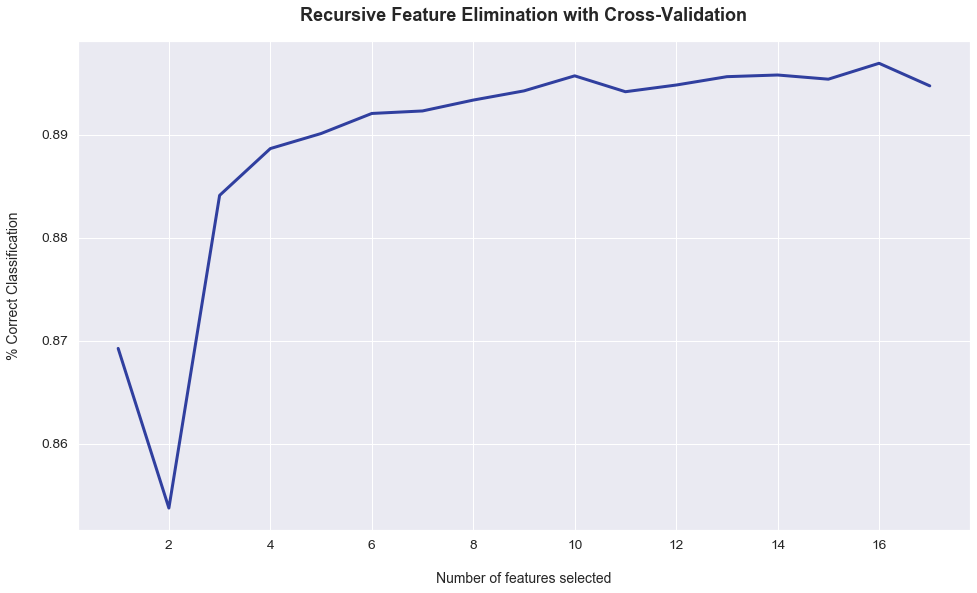

In [161]:
# plotting the rfecv chart for feature selection
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [164]:
df_x = pd.DataFrame(X, columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'])

print(np.where(rfecv.support_ == False)[0])

df_x.drop(df_x.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[9]


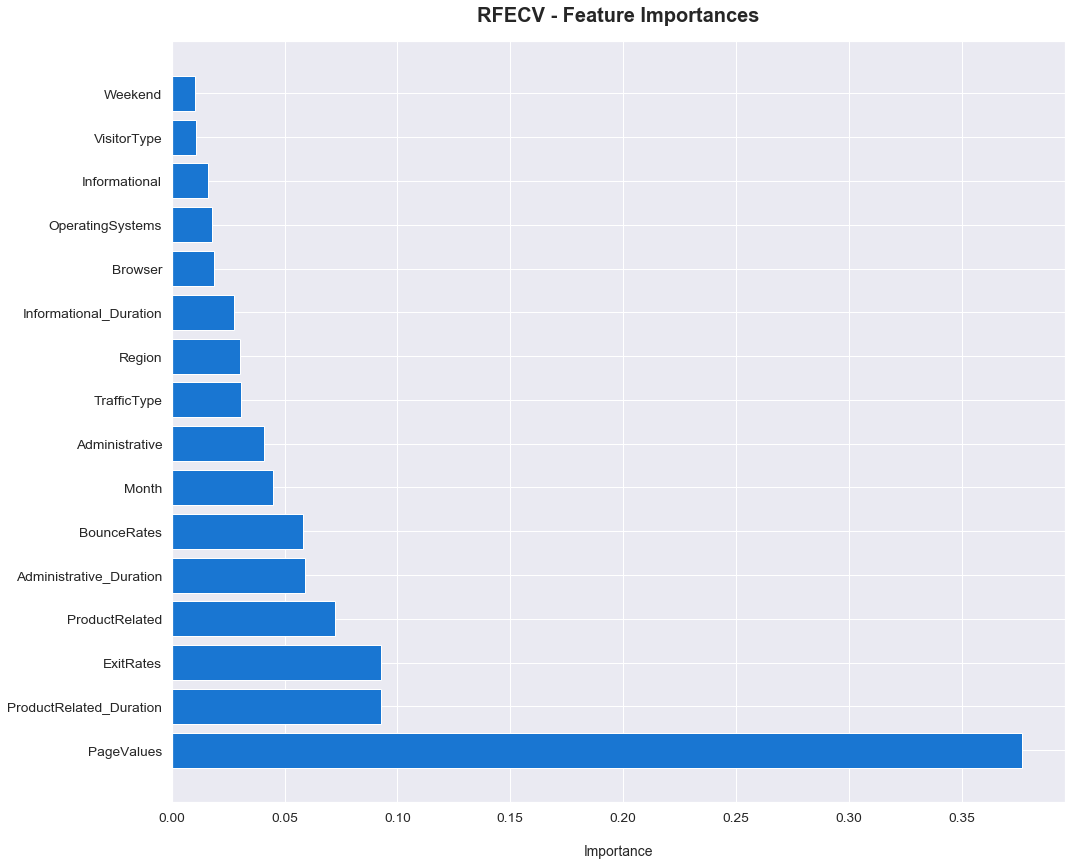

In [165]:
# plotting a bargraph of each selected feature according to their importance
dset = pd.DataFrame()
dset['attr'] = df_x.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

## Data Oversampling with SMOTE

In [167]:
# splitting the dataset beofore applying smote oversampling
X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape

(9864, 16)

In [10]:
#applying smote oversampling to address data imbalance
smote = SMOTE(random_state=1, k_neighbors=6)

X_train_smote, y_smote = smote.fit_resample(X_train, y_train)
print(X_train_smote.shape)


(16676, 17)


In [24]:
#converting y_train to a dataframe for plotting
y_df = pd.DataFrame(y_train)
print(y_df["Revenue"].value_counts())

0    8338
1    1526
Name: Revenue, dtype: int64


In [23]:
#converting y_smote to a dataframe for plotting
y_sdf = pd.DataFrame(y_smote)
print(y_sdf["Revenue"].value_counts())

1    8338
0    8338
Name: Revenue, dtype: int64


   Y train  Y smote
0     8338     8338
1     1526     8338


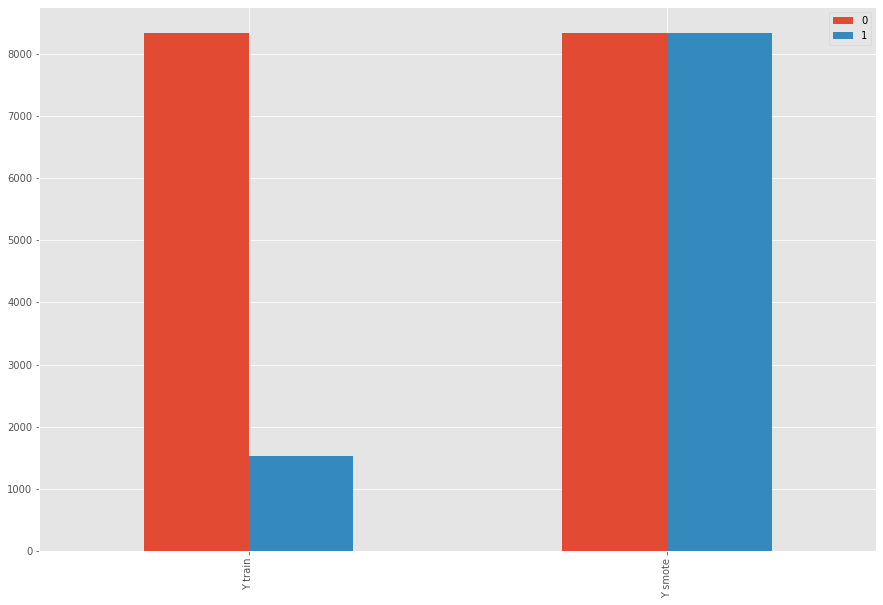

In [31]:
# plotting the dataset before and after smote oversampling
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
y_dict = {'Y train': [8338, 1526], 'Y smote': [8338, 8338]}
y_comb = pd.DataFrame(data=y_dict)
print(y_comb)

# plotting the rss values of each feature on the train and test data side by side as a multiple bargraph
style.use('ggplot')
y_comb.T.plot(kind='bar',figsize=(15,10))


# Modelling

## Base Model - KNN

In [178]:
# creating a KNN model
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train_smote, y_smote)

KNeighborsClassifier(n_neighbors=8)

In [179]:
# checking the accuracy, precision, recall and f1-score of the KNN model
y_pred_knn = knn.predict(X_test)
print (accuracy_score(y_test, y_pred_knn))
print(metrics.classification_report(y_test, y_pred_knn)) 

0.7923763179237632
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      2084
           1       0.40      0.66      0.50       382

    accuracy                           0.79      2466
   macro avg       0.66      0.74      0.68      2466
weighted avg       0.85      0.79      0.81      2466



## Model Bagging - Random Forest

In [135]:
#Random Forest model
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid_rf = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_stack = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv= 5)
rf_stack.fit(X_train_smote, y_smote)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [136]:
# checking the accuracy, precision, recall and f1-score of the Random forest model and
y_pred = rf_stack.predict(X_test)
print (accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred)) 

0.8856447688564477
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2084
           1       0.62      0.69      0.65       382

    accuracy                           0.89      2466
   macro avg       0.78      0.81      0.79      2466
weighted avg       0.89      0.89      0.89      2466



## Model Boosting - XGB

In [12]:
# creating a xgbclassifier model
xgb = XGBClassifier()
# xgb.fit(X_train_smote, y_smote)


xgb_stack = GridSearchCV(xgb,{'max_depth': [2,4,6,8, 10, 12, 14],
                    'n_estimators': [50,100,200, 300, 400, 500, 600]}, 
                    verbose=1, 
                    scoring='neg_log_loss')

xgb_stack.fit(X_train_smote, y_smote)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encou

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed: 12.6min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [139]:
# checking the accuracy, precision, recall and f1-score of the xgb_stack model tuned up to 14 md and 600 ne
y_pred_xgb = xgb_stack.predict(X_test)
print (accuracy_score(y_test, y_pred_xgb))
print(metrics.classification_report(y_test, y_pred_xgb))

0.8990267639902676
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2084
           1       0.68      0.67      0.67       382

    accuracy                           0.90      2466
   macro avg       0.81      0.81      0.81      2466
weighted avg       0.90      0.90      0.90      2466



## Model Stacking 

In [14]:
# defining the function to create a stacked model ensemble
def get_stacking():
    # define the base models
    level0 = list()
#     level0.append(('randomForest', rf_stack))
#     level0.append(('xgboost', xgb_stack))
#     level0.append(('lr', lr_stack))
    level0.append(('lr_b', lr))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


In [15]:
stack_model_light = get_stacking()
stack_model_light.fit(X_train_smote, y_smote)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encou

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed: 12.4min finished


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encou

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encou

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encou

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encou

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encou

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\akinmade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\User

StackingClassifier(cv=5,
                   estimators=[('xgboost',
                                GridSearchCV(estimator=XGBClassifier(base_score=None,
                                                                     booster=None,
                                                                     colsample_bylevel=None,
                                                                     colsample_bynode=None,
                                                                     colsample_bytree=None,
                                                                     gamma=None,
                                                                     gpu_id=None,
                                                                     importance_type='gain',
                                                                     interaction_constraints=None,
                                                                     learning_rate=None,
                                          

## using XGB + Random Forest at level 0 and Logistic Regression at level 1

In [188]:
# checking the accuracy, precision, recall and f1-score of the normal stacked model using xgb_stack, rf_stack at lvl0 and LR at lvl1
y_pred_stack = stack_model.predict(X_test)
print (accuracy_score(y_test, y_pred_stack))
print(metrics.classification_report(y_test, y_pred_stack))

0.8880778588807786
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2084
           1       0.63      0.68      0.65       382

    accuracy                           0.89      2466
   macro avg       0.78      0.80      0.79      2466
weighted avg       0.89      0.89      0.89      2466



## using XGB + Logistic Regression at level 0 and Logistic Regression at level 1

In [155]:
# checking the accuracy, precision, recall and f1-score of the normal stacked model lr, xgb_stack, dt lv1: lr basic standardzd, 80%
y_pred_stack = stack_model.predict(X_test)
print (accuracy_score(y_test, y_pred_stack))
print(metrics.classification_report(y_test, y_pred_stack))

0.8864557988645579
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2084
           1       0.61      0.73      0.67       382

    accuracy                           0.89      2466
   macro avg       0.78      0.82      0.80      2466
weighted avg       0.90      0.89      0.89      2466

